<a href="https://colab.research.google.com/github/roychowdary1597/Airline-Passenger-Satisfaction/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
print(os.getcwd())

/content


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Deep Learning ANN/satisfaction.xlsx')

In [8]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.shape

(129880, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [7]:
df.isna().sum()

,0
id,0
satisfaction_v2,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0


# **Pre-processing**

In [9]:
df.drop(columns='id',axis=1,inplace=True)

In [11]:
# Renaming Columns for our fesability
df = df.rename(columns={'satisfaction_v2':'satisfaction', 'Gender':'gender', 'Customer Type':'customer_type',
                        'Age':'age', 'Type of Travel':'travel_type', 'Class':'class', 'Flight Distance':'distance',
                        'Seat comfort':'seat_comfort', 'Departure/Arrival time convenient':'dep_val_time_convenient',
                        'Food and drink':'food_drink', 'Gate location':'gate','Inflight wifi service':'wifi_service',
                        'Inflight entertainment':'entertainment','Online support':'online_support',
                        'Ease of Online booking':'online_booking_service','On-board service':'onboard_service',
                        'Leg room service':'leg_room_service','Baggage handling':'baggage_handling',
                        'Checkin service':'checkin_service','Cleanliness':'cleanliness','Online boarding':'online_boarding',
                        'Departure Delay in Minutes':'departure_delay_minutes','Arrival Delay in Minutes':'arrival_delay_minutes'})

In [12]:
df.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'travel_type',
       'class', 'distance', 'seat_comfort', 'dep_val_time_convenient',
       'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support',
       'online_booking_service', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_minutes', 'arrival_delay_minutes'],
      dtype='object')

In [14]:
# missing values
df.isna().sum().sort_values(ascending=False)

,0
arrival_delay_minutes,393
gender,0
satisfaction,0
age,0
travel_type,0
class,0
customer_type,0
distance,0
seat_comfort,0
food_drink,0


In [17]:
# Dropping nulls
df = df.dropna(axis=0)

In [18]:
df.shape #shape after dropping the nulls

(129487, 23)

In [19]:
#- Duplicates
df.duplicated().sum()

np.int64(0)

In [21]:
int_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [22]:
int_cols

['age',
 'distance',
 'seat_comfort',
 'dep_val_time_convenient',
 'food_drink',
 'gate',
 'wifi_service',
 'entertainment',
 'online_support',
 'online_booking_service',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'departure_delay_minutes',
 'arrival_delay_minutes']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   satisfaction             129487 non-null  object 
 1   gender                   129487 non-null  object 
 2   customer_type            129487 non-null  object 
 3   age                      129487 non-null  int64  
 4   travel_type              129487 non-null  object 
 5   class                    129487 non-null  object 
 6   distance                 129487 non-null  int64  
 7   seat_comfort             129487 non-null  int64  
 8   dep_val_time_convenient  129487 non-null  int64  
 9   food_drink               129487 non-null  int64  
 10  gate                     129487 non-null  int64  
 11  wifi_service             129487 non-null  int64  
 12  entertainment            129487 non-null  int64  
 13  online_support           129487 non-null  int64  
 14  online_bo

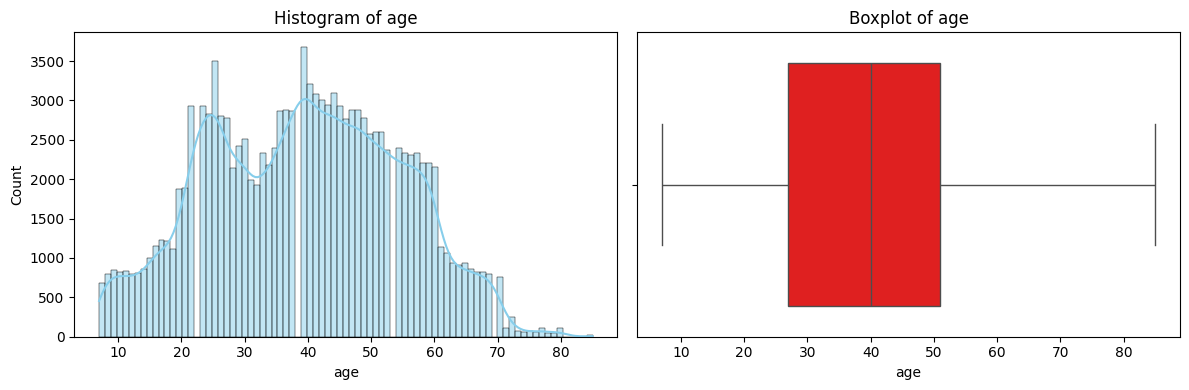

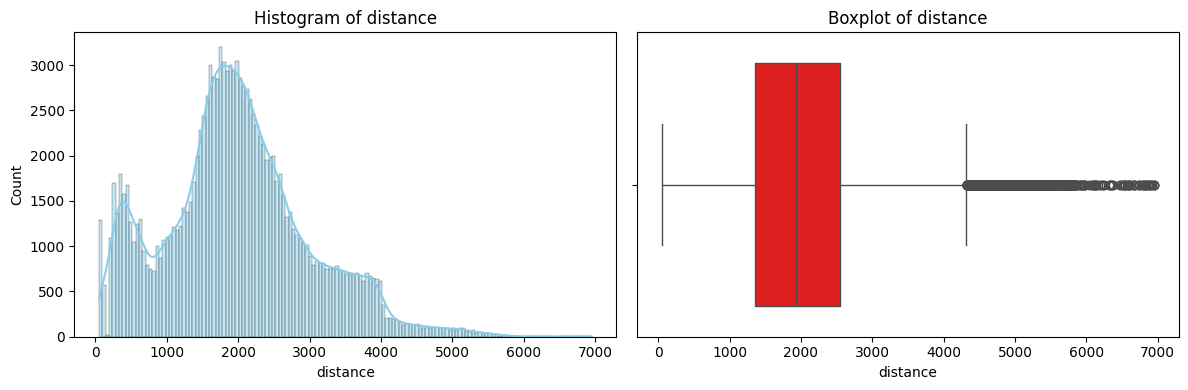

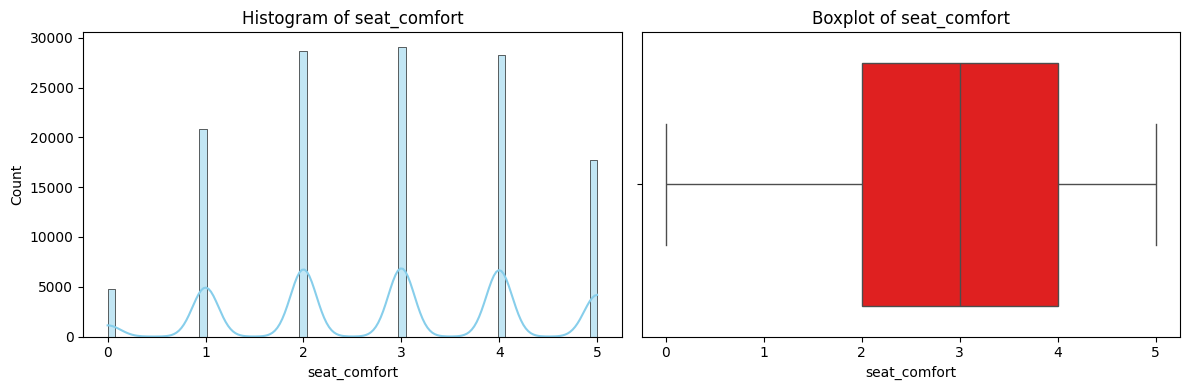

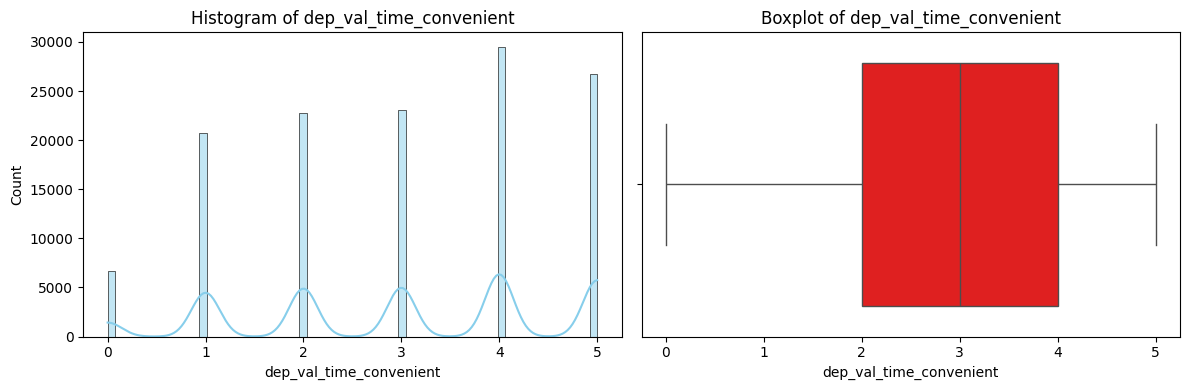

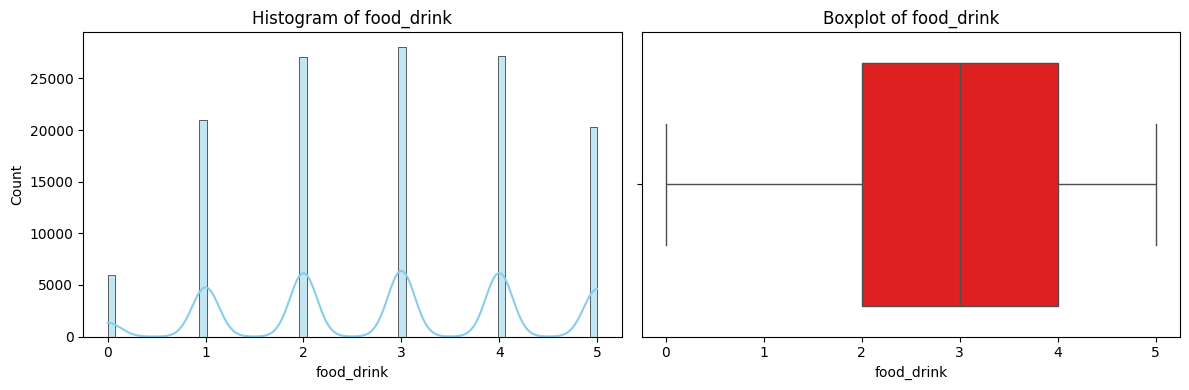

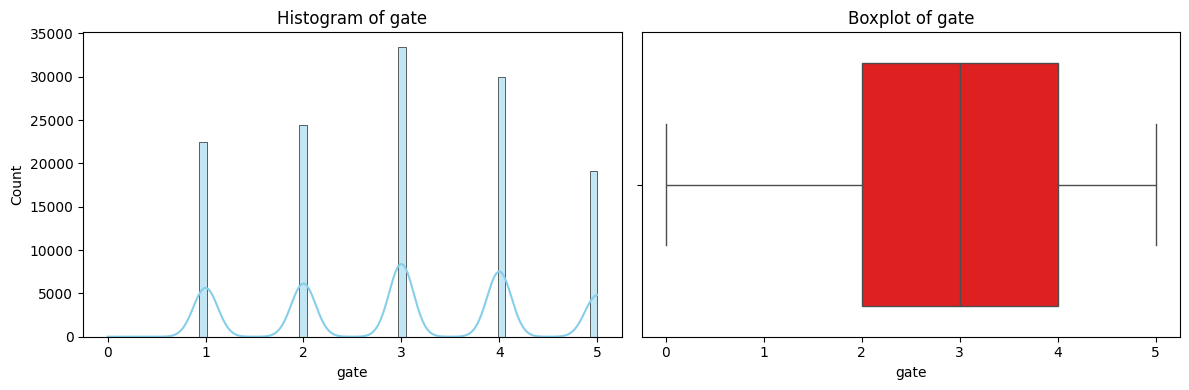

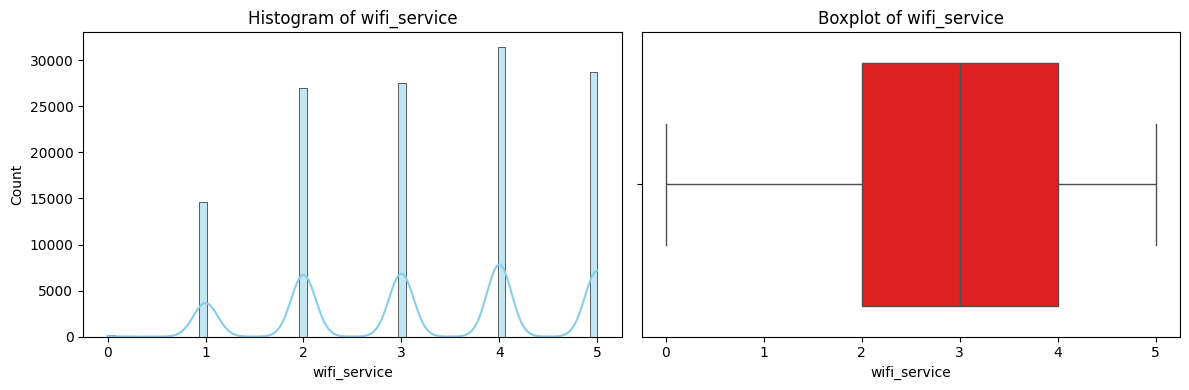

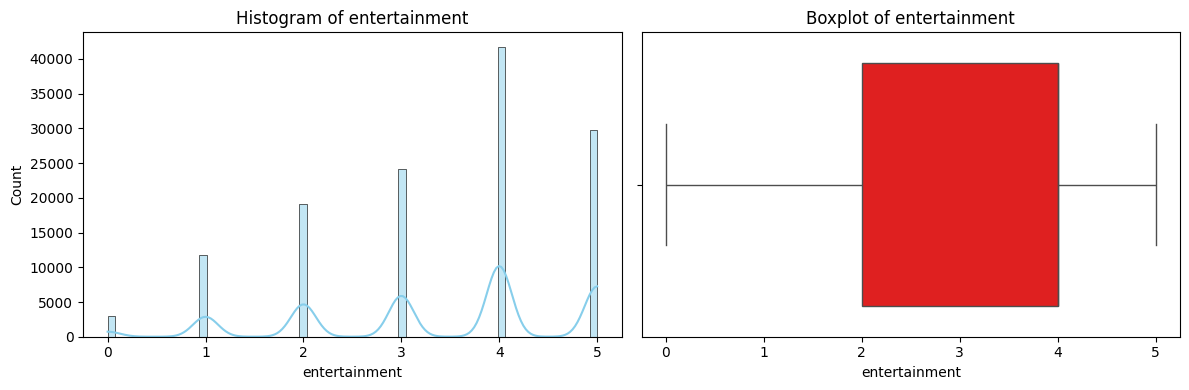

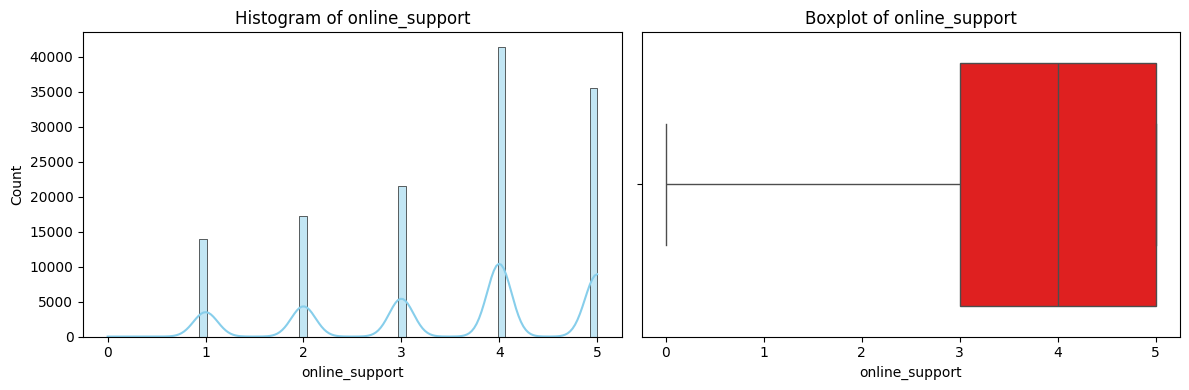

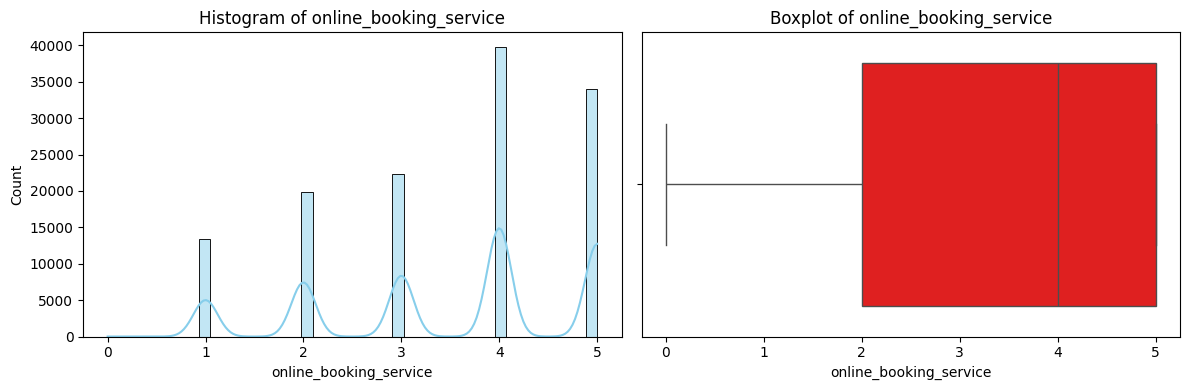

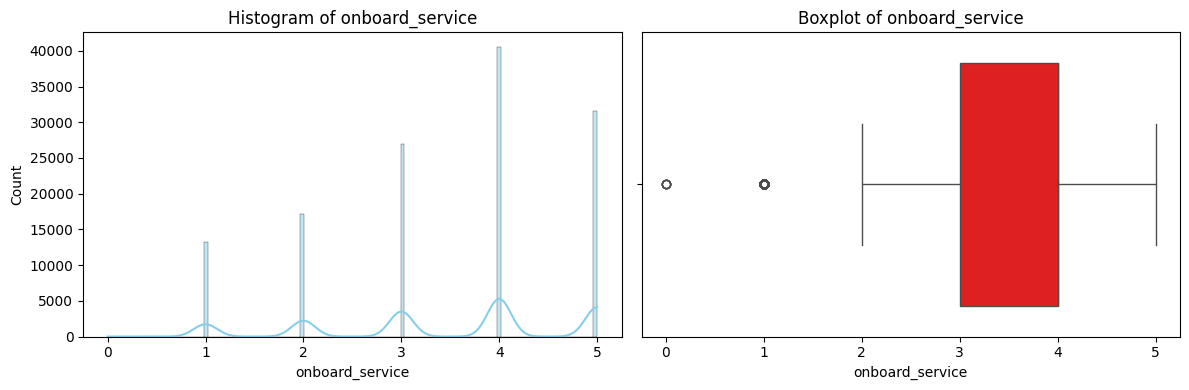

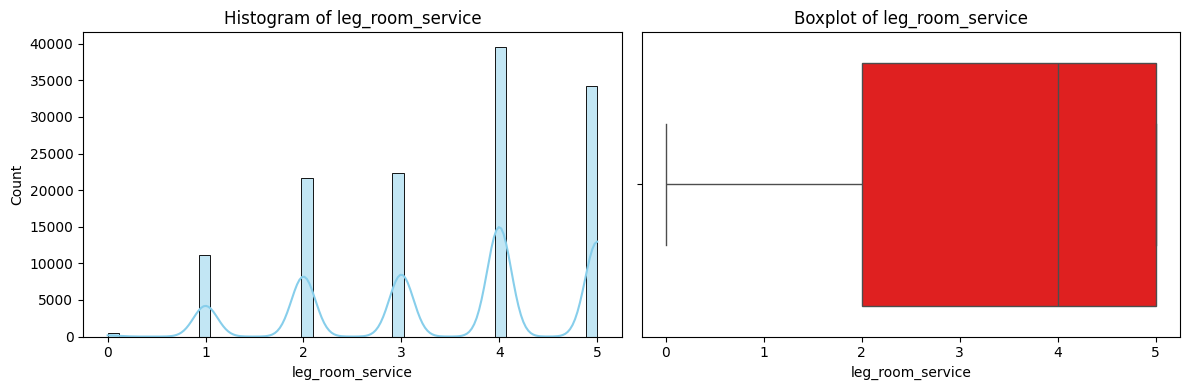

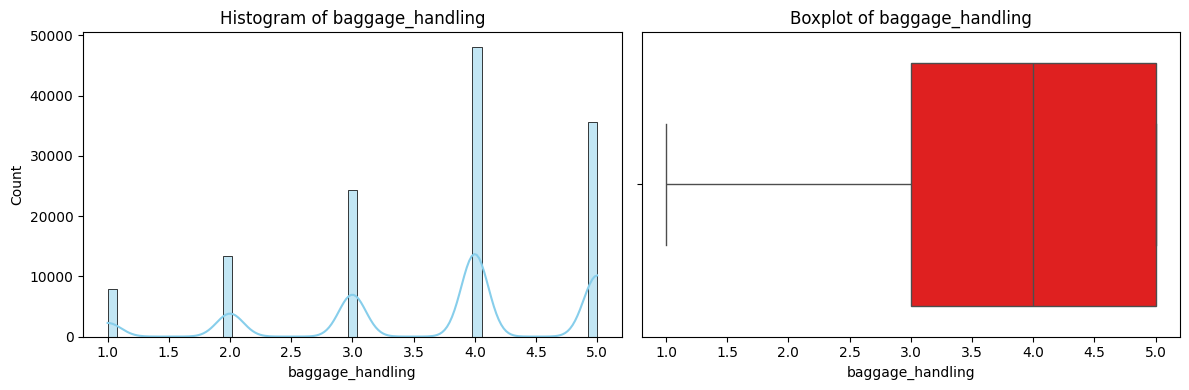

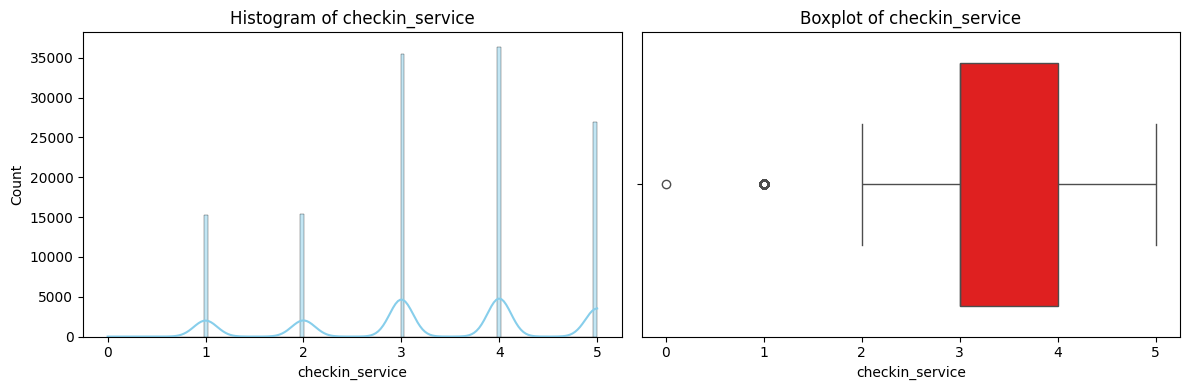

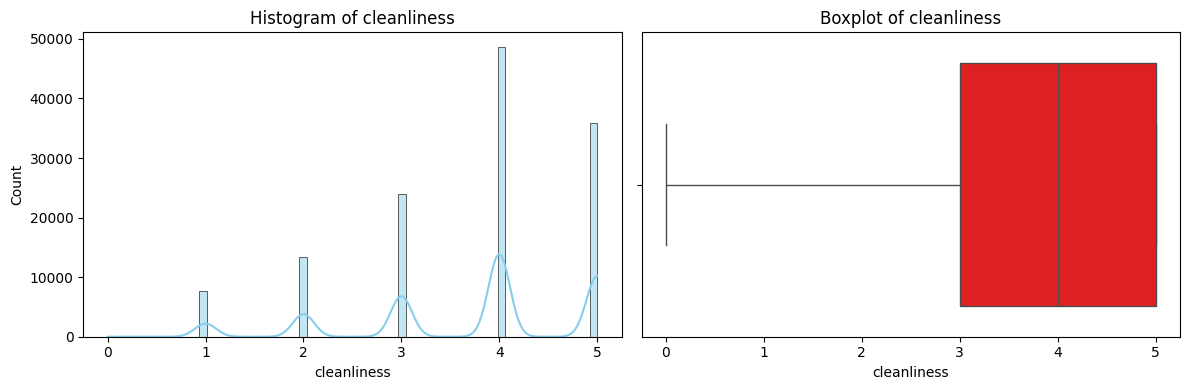

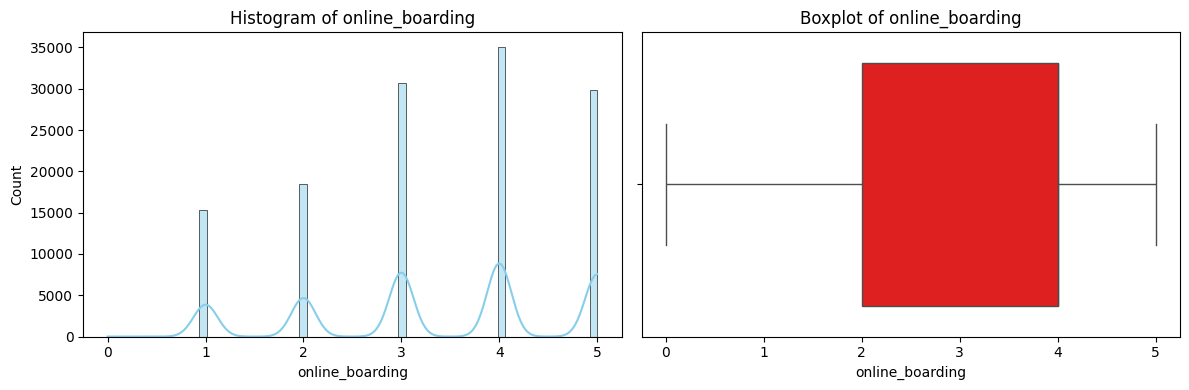

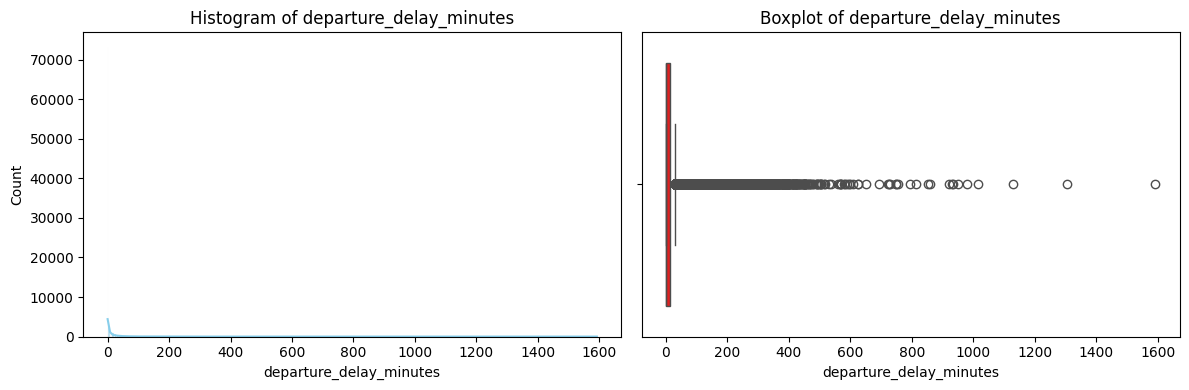

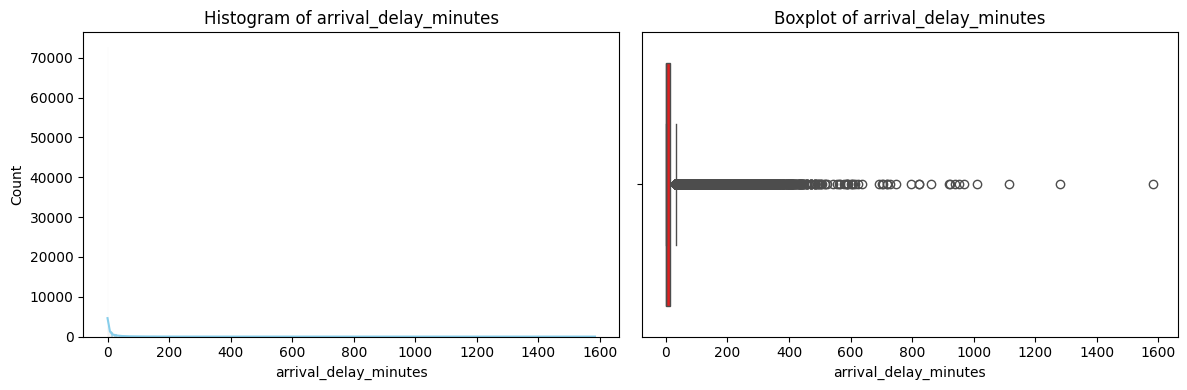

In [25]:
for col in int_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1], color='red')
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [27]:
df['travel_type'].value_counts()

,count
travel_type,
Business travel,89445
Personal Travel,40042


In [28]:
df['wifi_service'].value_counts()

,count
wifi_service,
4,31474
5,28738
3,27518
2,26957
1,14670
0,130


In [34]:
for col in int_cols:
    print(f"Value Counts",df[col].value_counts())

Value Counts age
39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64
Value Counts distance
1963    92
1812    87
1639    87
1789    86
1981    85
        ..
5621     1
5842     1
5736     1
5063     1
5345     1
Name: count, Length: 5397, dtype: int64
Value Counts seat_comfort
3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: count, dtype: int64
Value Counts dep_val_time_convenient
4    29504
5    26723
3    23110
2    22735
1    20771
0     6644
Name: count, dtype: int64
Value Counts food_drink
3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: count, dtype: int64
Value Counts gate
3    33451
4    29997
2    24441
1    22497
5    19099
0        2
Name: count, dtype: int64
Value Counts wifi_service
4    31474
5    28738
3    27518
2    26957
1    14670
0      130
Name: count, dtype: int64
Value Counts entertainment
4    41752
5    29748
3

# **EDA**

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
seat_comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
dep_val_time_convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
food_drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
gate,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
wifi_service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
online_support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
online_booking_service,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [39]:
df.describe(exclude = ['float', 'int64']).T

,count,unique,top,freq
satisfaction,129487,2,satisfied,70882
gender,129487,2,Female,65703
customer_type,129487,2,Loyal Customer,105773
travel_type,129487,2,Business travel,89445
class,129487,3,Business,61990


In [40]:
int_cols

['age',
 'distance',
 'seat_comfort',
 'dep_val_time_convenient',
 'food_drink',
 'gate',
 'wifi_service',
 'entertainment',
 'online_support',
 'online_booking_service',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'departure_delay_minutes',
 'arrival_delay_minutes']

In [41]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

In [42]:
obj_cols

['satisfaction', 'gender', 'customer_type', 'travel_type', 'class']

/tmp/ipython-input-1849178266.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.05,0.5))


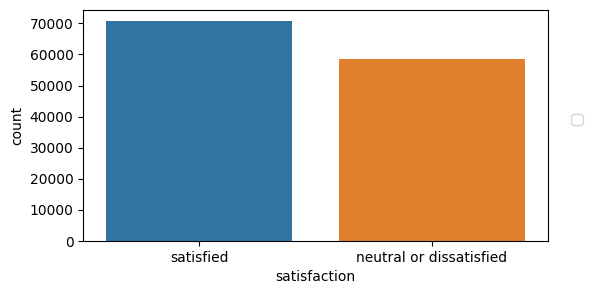

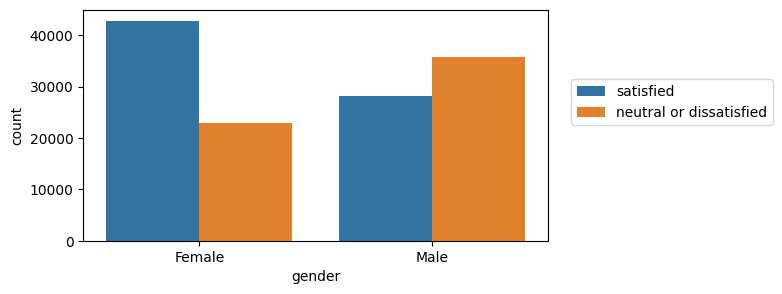

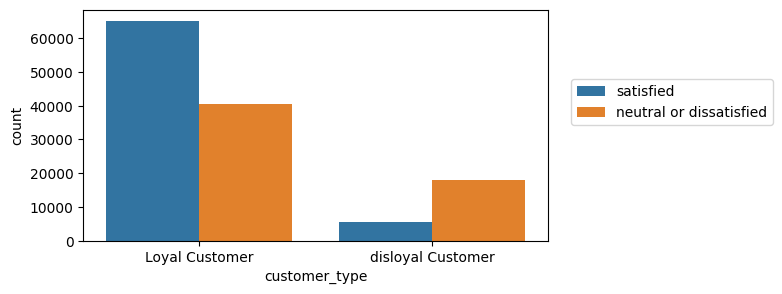

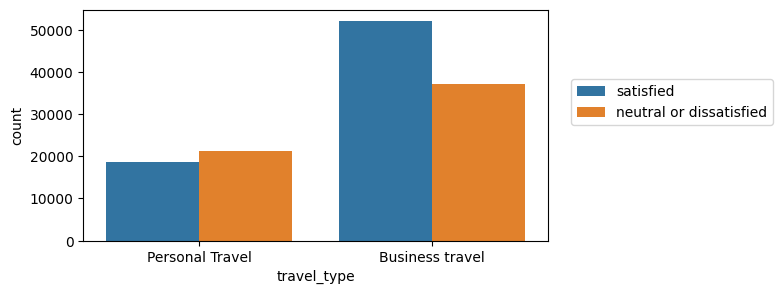

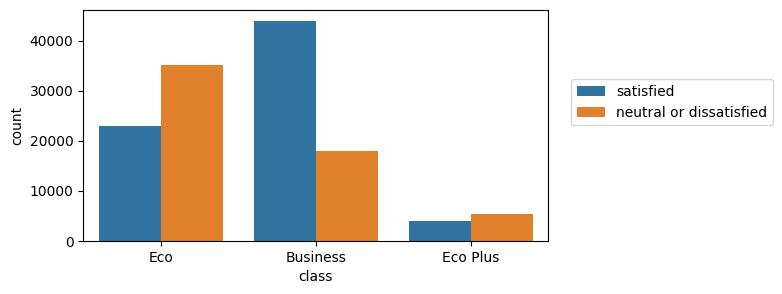

In [53]:
for col in obj_cols:
  plt.figure(figsize=(6,3),dpi=100)
  sns.countplot(data= df,x=col,hue ='satisfaction')
  plt.yticks()
  plt.legend(loc=(1.05,0.5))
  plt.show()

In [54]:
df['class'].value_counts()

,count
class,
Business,61990
Eco,58117
Eco Plus,9380


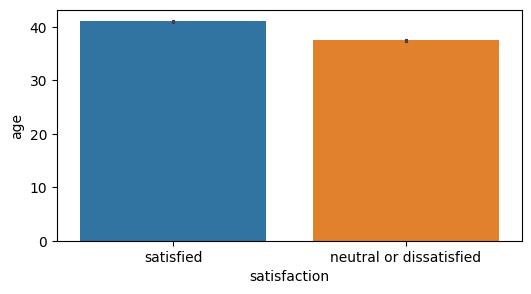

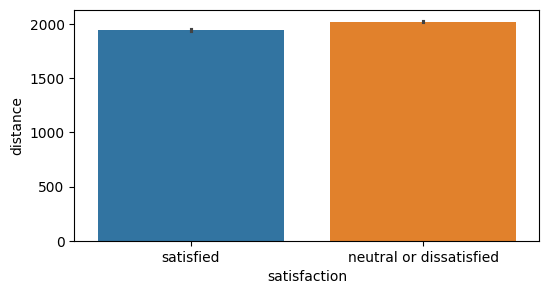

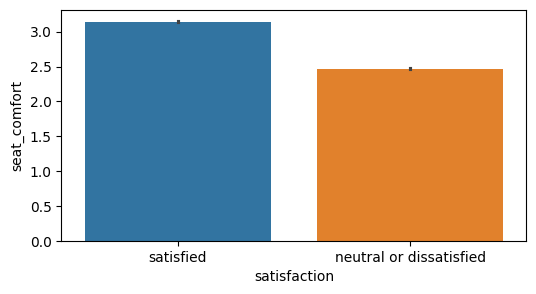

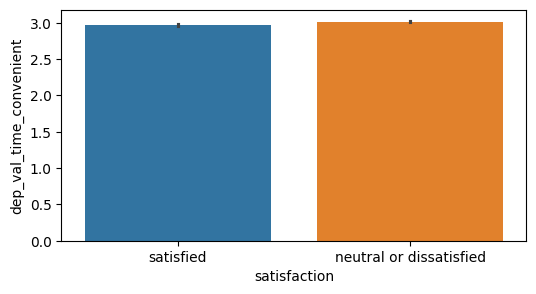

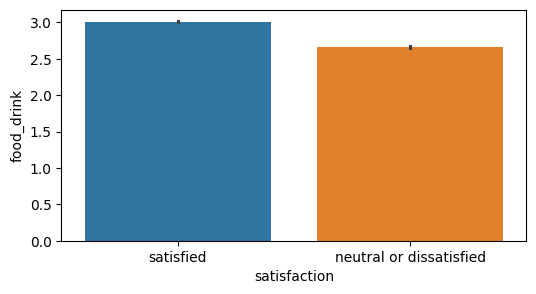

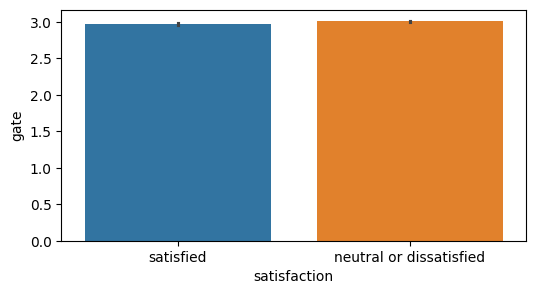

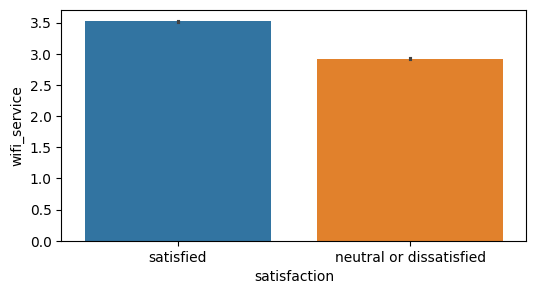

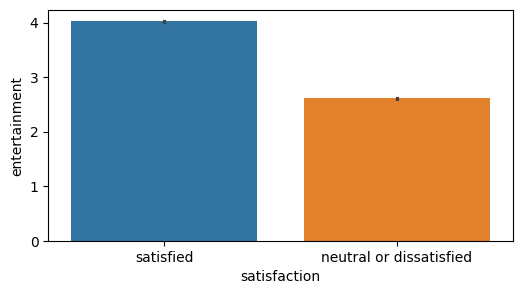

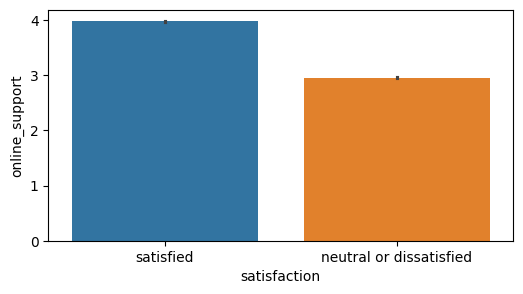

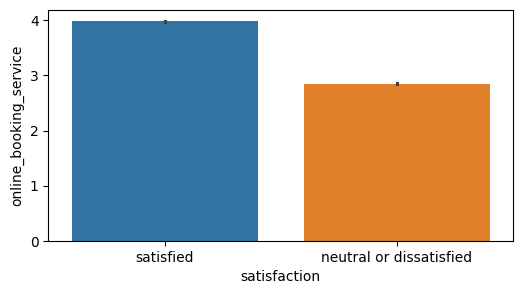

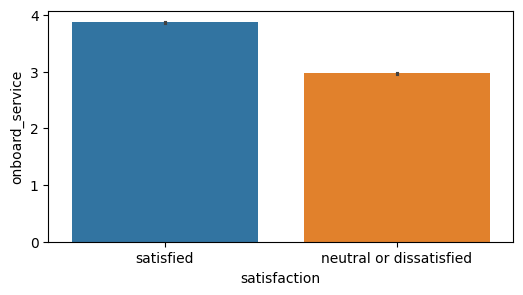

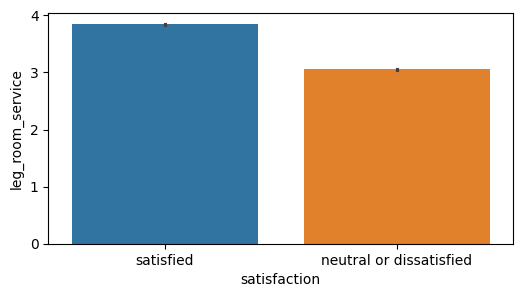

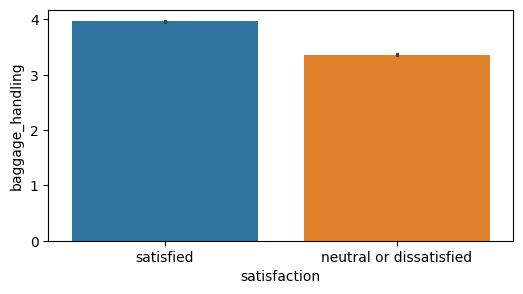

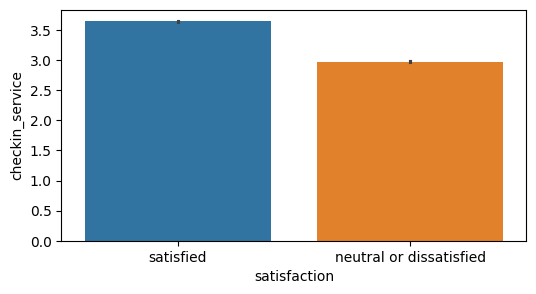

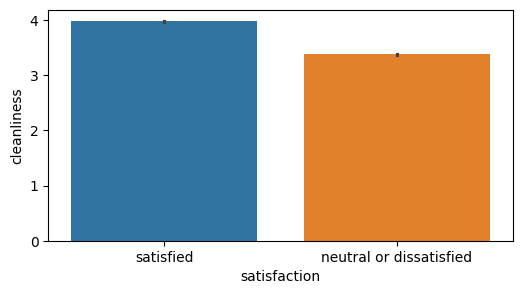

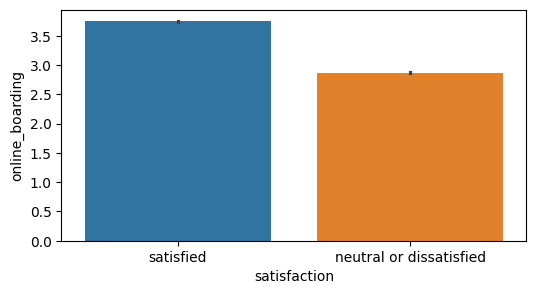

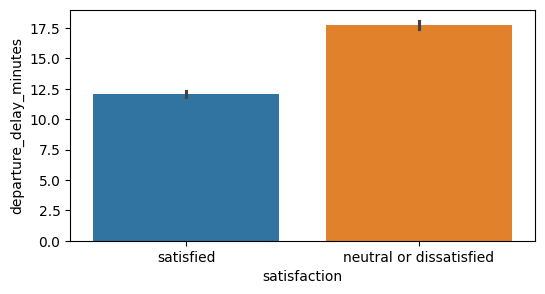

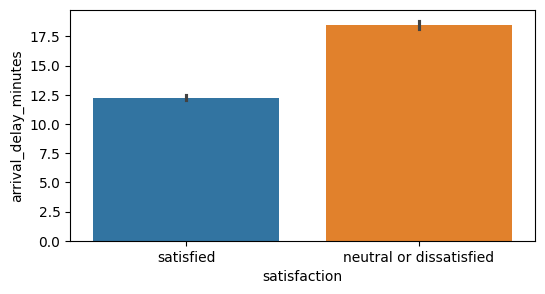

In [58]:
for col in int_cols:
  plt.figure(figsize=(6,3))
  sns.barplot(data=df,x='satisfaction',y=col,hue='satisfaction')
  plt.show()